## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.



## Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

 

In [408]:
#importing the required packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
# hide warnings
import warnings 
warnings.filterwarnings('ignore')

In [409]:
#reads data set to df variable
df = pd.read_csv("train (1).csv")

In [410]:
# In the data dictinary it is given in many categorical variable 'NA' as 
# for example 'BsmtCond' in this col 'NA' means no basement,but if we read csv file directly it will treat as null 
# so reading the categorical variables with 'keep_default_na=False' and merge them with continuous variables

In [411]:
l_cat_NA=['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

In [412]:
df_cat_NA = pd.read_csv("train (1).csv",keep_default_na=False,usecols=l_cat_NA)

In [413]:
df_cat_NA = df_cat_NA.replace('NA', 'No')

In [414]:
df_cat_NA.head()

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,No,BrkFace,Gd,TA,No,GLQ,Unf,No,Attchd,RFn,TA,TA,No,No,No
1,No,None,Gd,TA,Gd,ALQ,Unf,TA,Attchd,RFn,TA,TA,No,No,No
2,No,BrkFace,Gd,TA,Mn,GLQ,Unf,TA,Attchd,RFn,TA,TA,No,No,No
3,No,None,TA,Gd,No,ALQ,Unf,Gd,Detchd,Unf,TA,TA,No,No,No
4,No,BrkFace,Gd,TA,Av,GLQ,Unf,TA,Attchd,RFn,TA,TA,No,No,No


In [415]:
df_remaining = pd.read_csv("train (1).csv",usecols=[c for c in df.columns if c not in l_cat_NA])

In [416]:
df_remaining .head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [417]:
df = pd.concat([df_cat_NA, df_remaining], axis=1)

In [418]:
#to get dimensions of data set
df.shape


(1460, 81)

In [419]:
def cate(df):
    if df['MSSubClass'] == 20:
        return '1-STORY 1946 & NEWER ALL STYLES'
    if df['MSSubClass'] == 30:
        return '1-STORY 1945 & OLDER'
    if df['MSSubClass'] == 40:
        return '1-STORY W/FINISHED ATTIC ALL AGES'
    if df['MSSubClass'] == 45:
        return '1-1/2 STORY - UNFINISHED ALL AGES'
    if df['MSSubClass'] == 50:
        return '1-1/2 STORY FINISHED ALL AGES'
    if df['MSSubClass'] == 60:
        return '2-STORY 1946 & NEWER'
    if df['MSSubClass'] == 70:
        return '2-STORY 1945 & OLDER'
    if df['MSSubClass'] == 75:
        return '2-1/2 STORY ALL AGES'
    if df['MSSubClass'] == 80:
        return 'SPLIT OR MULTI-LEVEL'
    if df['MSSubClass'] == 85:
        return 'SPLIT FOYER'
    if df['MSSubClass'] == 90:
        return 'DUPLEX - ALL STYLES AND AGES'
    if df['MSSubClass'] == 120:
        return '1-STORY PUD (Planned Unit Development) - 1946 & NEWER'
    if df['MSSubClass'] == 150:
        return '1-1/2 STORY PUD - ALL AGES'
    if df['MSSubClass'] == 160:
        return '2-STORY PUD - 1946 & NEWER'
    if df['MSSubClass'] == 180:
        return 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER'
    if df['MSSubClass'] == 190:
        return '2 FAMILY CONVERSION - ALL STYLES AND AGES'

In [420]:
#Converting MSSubClass to categorical variable
df['MSSubClass']=df.apply(cate,axis=1)

In [421]:
#tocheck the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Alley          1460 non-null   object 
 1   MasVnrType     1460 non-null   object 
 2   BsmtQual       1460 non-null   object 
 3   BsmtCond       1460 non-null   object 
 4   BsmtExposure   1460 non-null   object 
 5   BsmtFinType1   1460 non-null   object 
 6   BsmtFinType2   1460 non-null   object 
 7   FireplaceQu    1460 non-null   object 
 8   GarageType     1460 non-null   object 
 9   GarageFinish   1460 non-null   object 
 10  GarageQual     1460 non-null   object 
 11  GarageCond     1460 non-null   object 
 12  PoolQC         1460 non-null   object 
 13  Fence          1460 non-null   object 
 14  MiscFeature    1460 non-null   object 
 15  Id             1460 non-null   int64  
 16  MSSubClass     1460 non-null   object 
 17  MSZoning       1460 non-null   object 
 18  LotFront

In [422]:
#to know spread of variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [423]:
# Tocheck duplicated rows
df.duplicated( ).sum()

0

### Checking for null values

In [424]:
df_null_count=df.isnull().sum()
df_null_count=df_null_count.to_frame()
df_null_count=df_null_count.rename(columns={0:"Total_null_values"})
df_null_count.reset_index(level=0, inplace=True)
df_null_count=df_null_count.rename(columns={"index":"Columns_names"})
df_null_count['Percentage_of_nullvalues']=df_null_count['Total_null_values'].apply(lambda x : round((x/len(df))*100,2))
df_null_count.sort_values(by=['Percentage_of_nullvalues'],inplace=True,ascending=False)

In [425]:
df_null_count.head(20)

,Columns_names,Total_null_values,Percentage_of_nullvalues
18,LotFrontage,259,17.74
65,GarageYrBlt,81,5.55
39,MasVnrArea,8,0.55
50,Electrical,1,0.07
0,Alley,0,0.00
53,LowQualFinSF,0,0.00
58,HalfBath,0,0.00
57,FullBath,0,0.00
56,BsmtHalfBath,0,0.00
55,BsmtFullBath,0,0.00


### Fixing Null values

In [426]:
# replacing nan with median
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

In [427]:
# replacing nan with median
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)

In [428]:
# replacing nan with mode
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

In [429]:
# converting the ordered categorical varibles to continuous variables
df['LandSlope'] = df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df.BsmtQual.map({'No':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df.BsmtCond.map({'No':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df.BsmtExposure.map({'No':0,'Mn':1,'Av':2,'Gd':3})
df['BsmtFinType1'] = df.BsmtFinType1.map({'No':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'No':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir'] = df.CentralAir.map({'N':0,'Y':1})
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df.GarageFinish.map({'No':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df.GarageQual.map({'No':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df.GarageCond.map({'No':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['LotShape'] = df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
df['LandSlope']= df.LandSlope.map({'Gtl':3,'Mod':2,'Sev':1})


In [430]:
# Converting years to age
df['YearBuilt_Age'] = df['YearBuilt'].max() - df['YearBuilt']
df['YearRemodAdd_Age'] = df['YearRemodAdd'].max() - df['YearRemodAdd']
df['YrSold_Age'] = df['YrSold'].max() - df['YrSold']
# Dropping columns
df.drop(['YearBuilt','YearRemodAdd','YrSold'], axis=1, inplace = True)


In [431]:
#dropping the least correlated varibles with target variable and cols which has a very high pertage of one particular category 
df.drop(['Id','GarageYrBlt','MoSold','LandContour','PavedDrive','BsmtFinType2','LandSlope','BsmtHalfBath','MiscFeature','MasVnrArea','PoolArea','PoolQC','RoofMatl','Condition2'],axis=1,inplace=True)

In [432]:
#taking the categorical in to list 
l_categorical=df.select_dtypes(include=['object'])

In [433]:
l=list(l_categorical.columns)

In [434]:
len(l)

23

In [435]:
l_categorical.columns

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'GarageType', 'Fence',
       'MSSubClass', 'MSZoning', 'Street', 'Utilities', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'Electrical',
       'Functional', 'SaleType', 'SaleCondition'],
      dtype='object')

In [436]:
#taking continuous variable into a list 
l1=df.select_dtypes(include=['float64','int64'])
l1=list(l1.columns)

### EDA

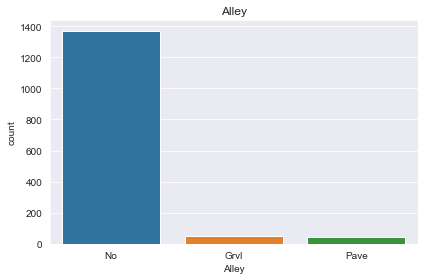

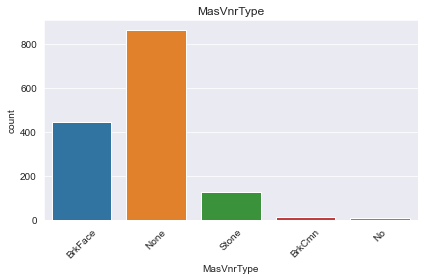

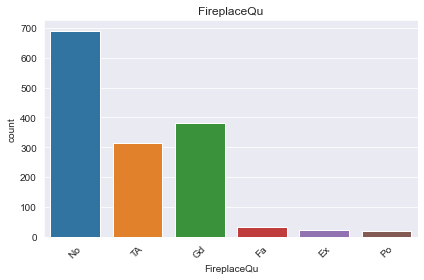

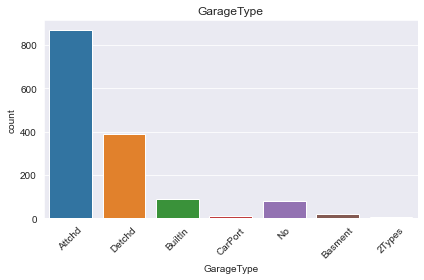

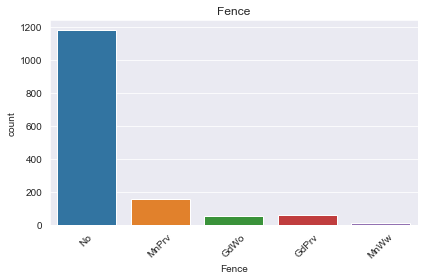

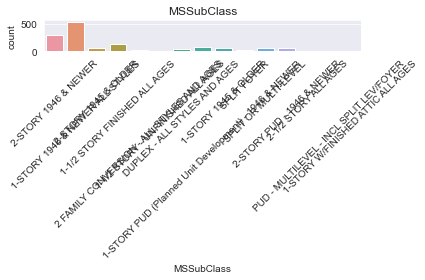

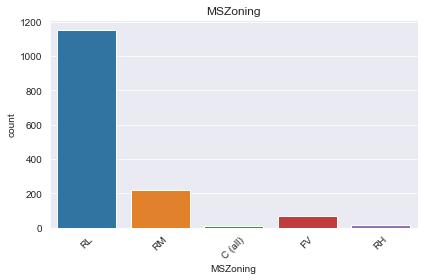

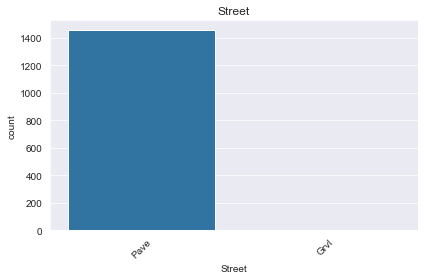

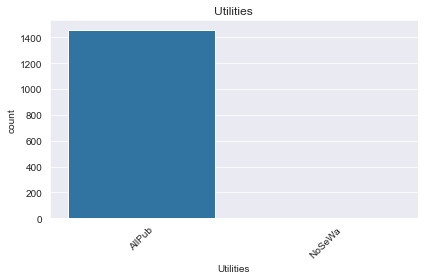

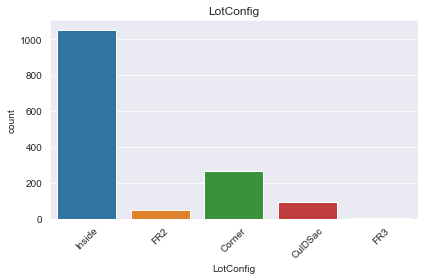

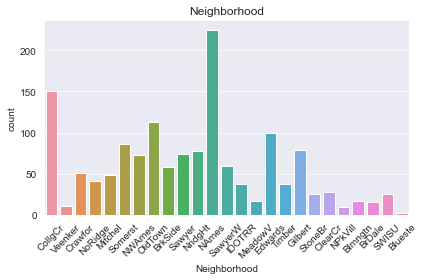

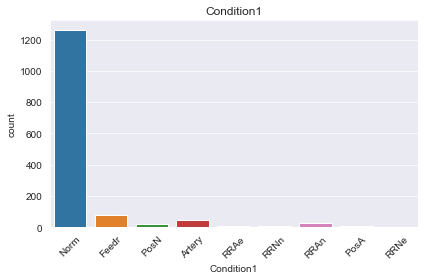

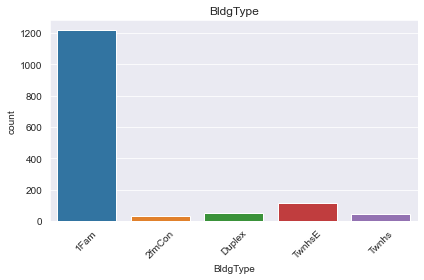

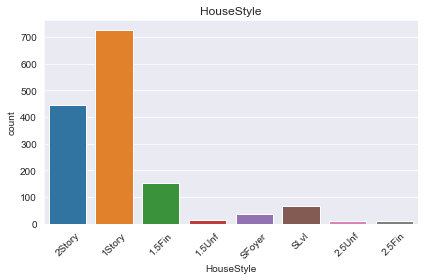

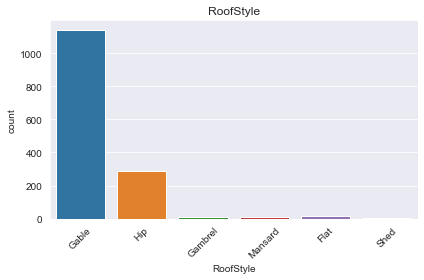

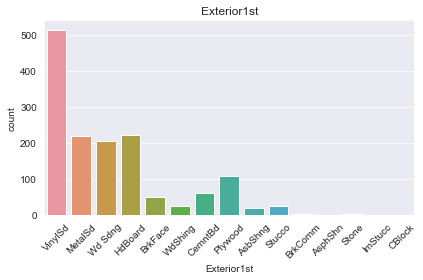

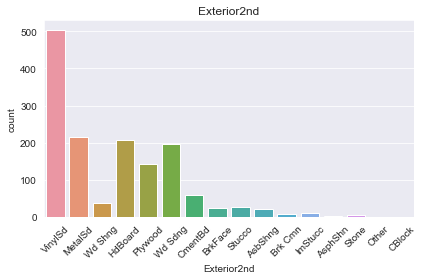

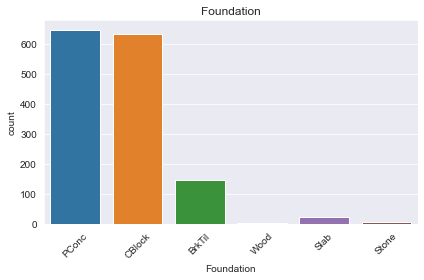

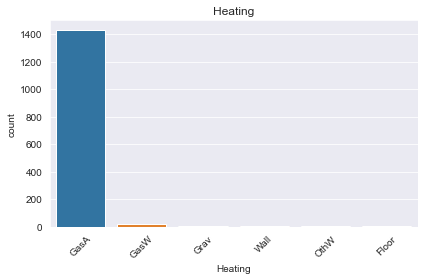

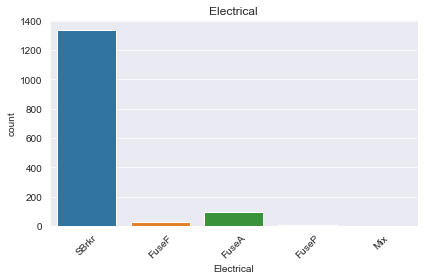

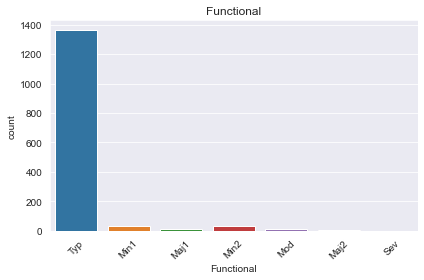

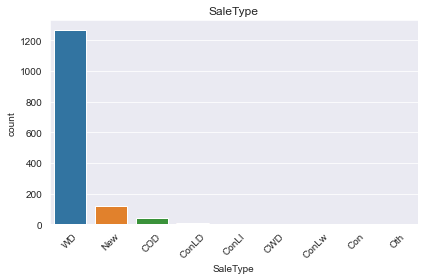

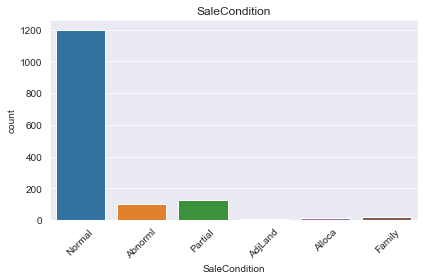

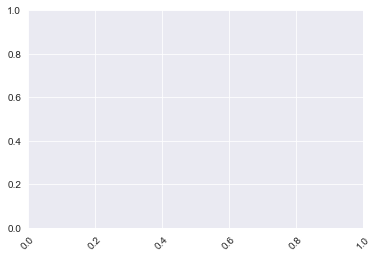

In [437]:



for i in l:
    sns.set_style("darkgrid")
    sns.countplot(x=i, data=df)
    plt.title(i)
    plt.tight_layout()
    plt.show()
    plt.xticks(rotation = 45)




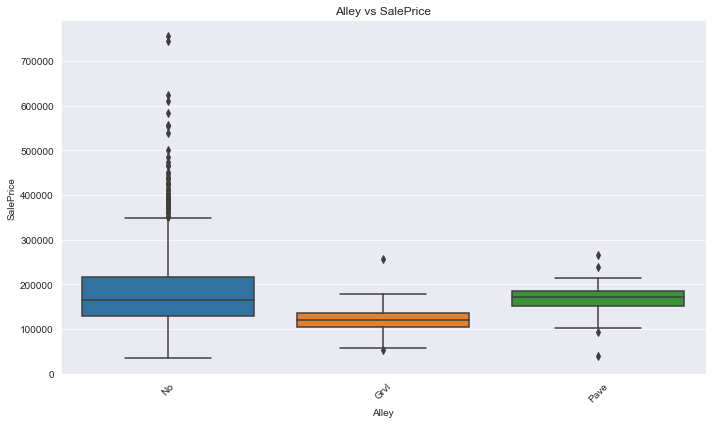

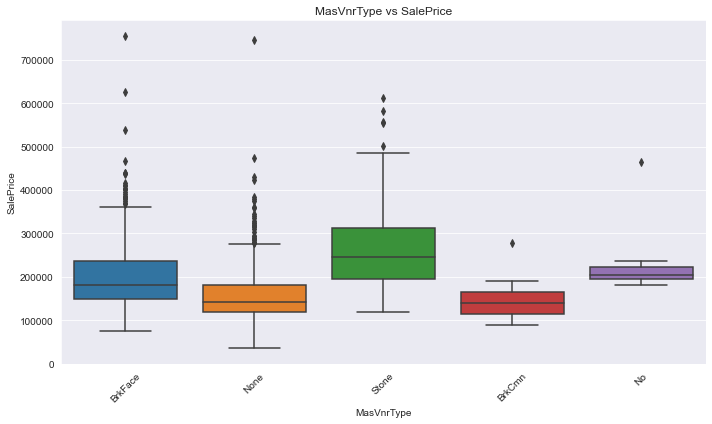

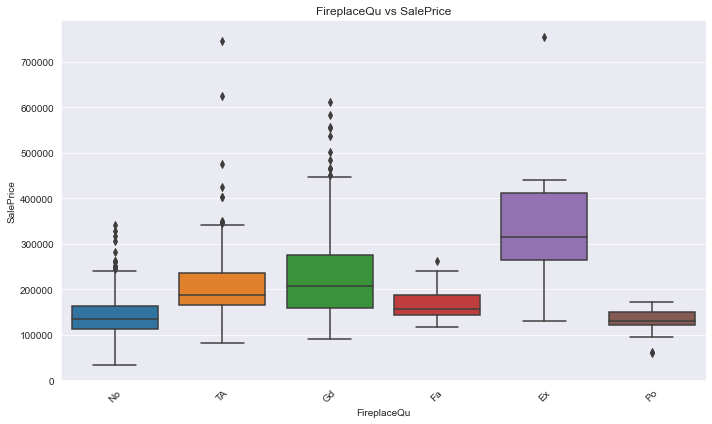

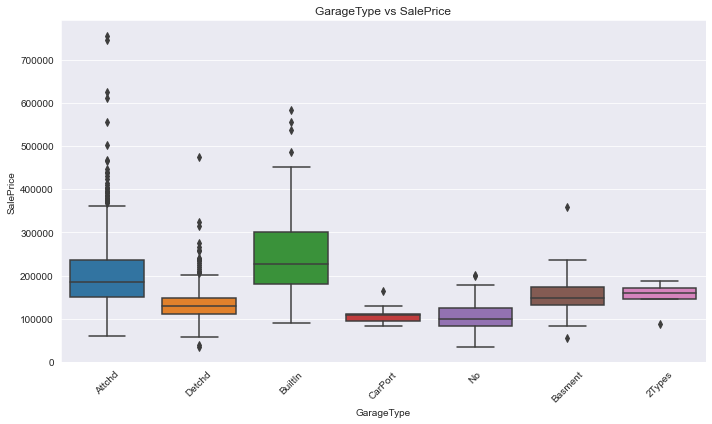

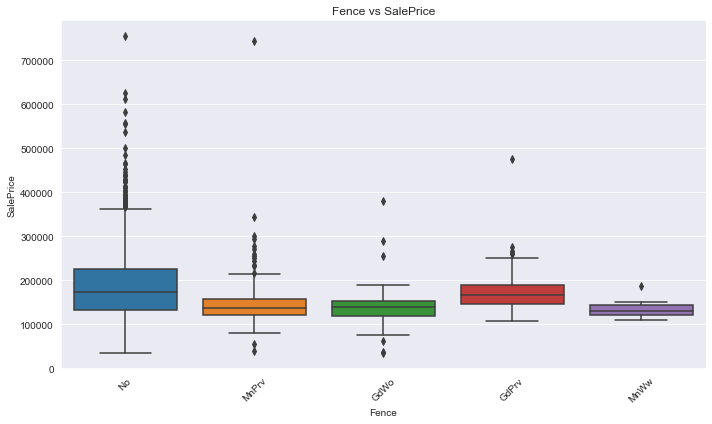

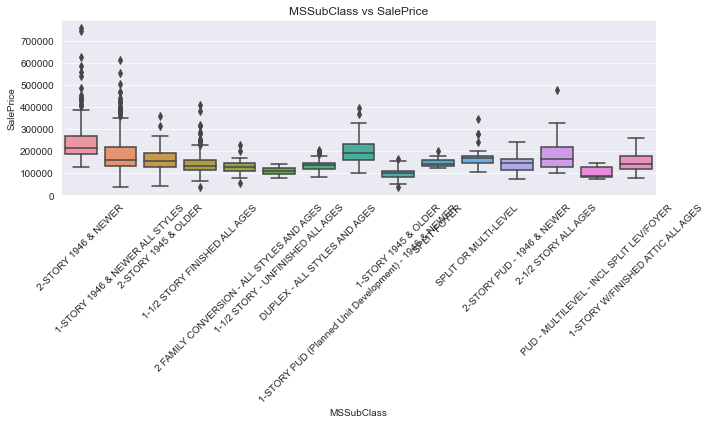

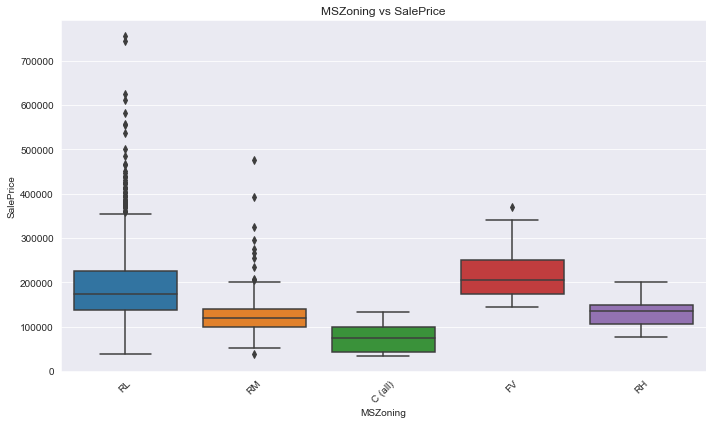

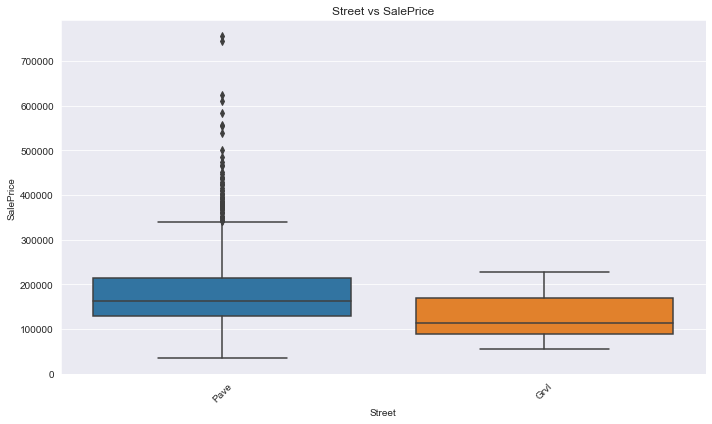

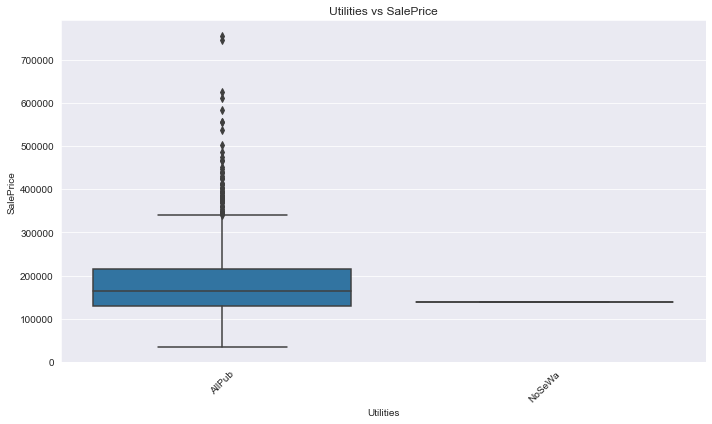

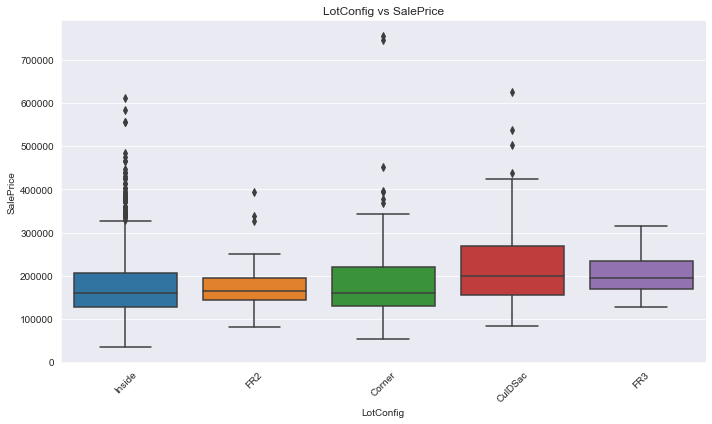

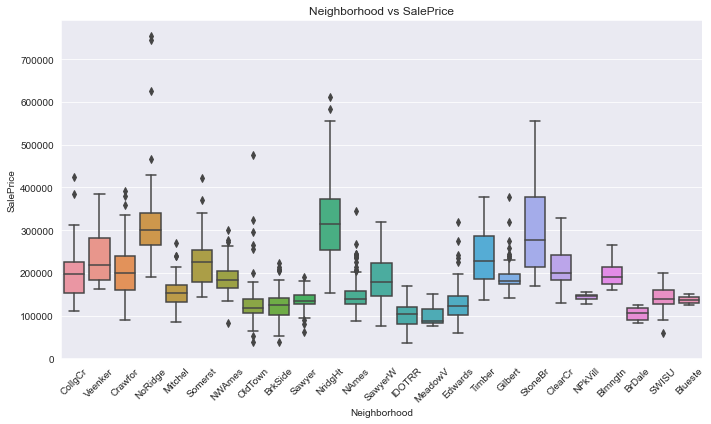

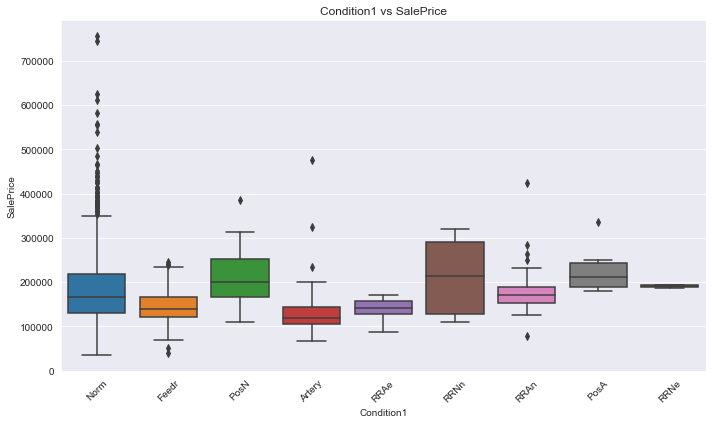

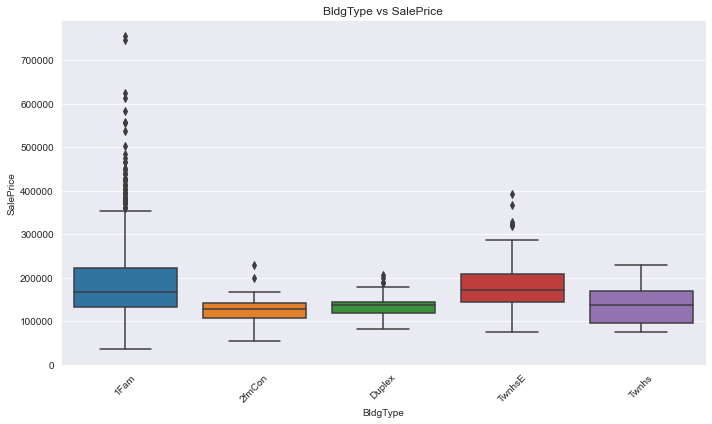

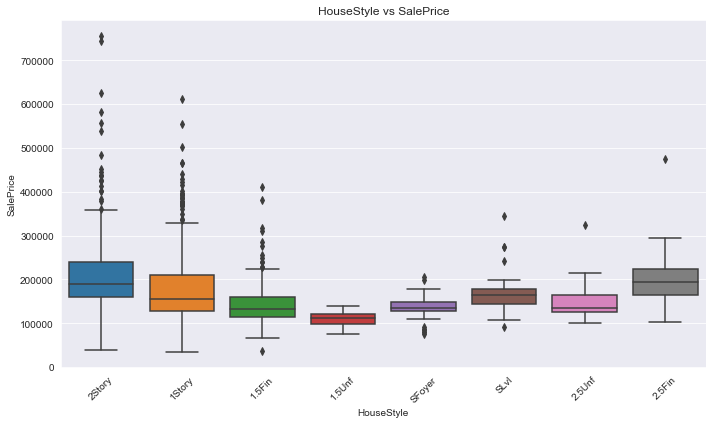

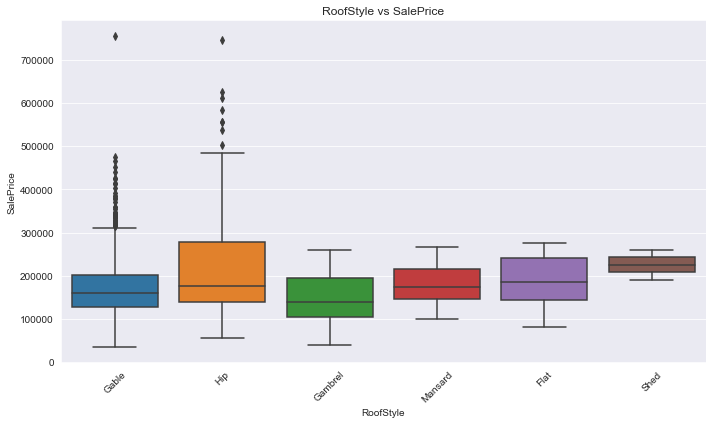

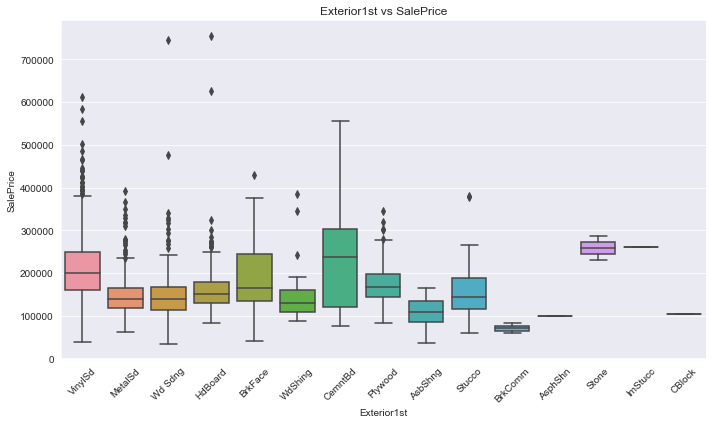

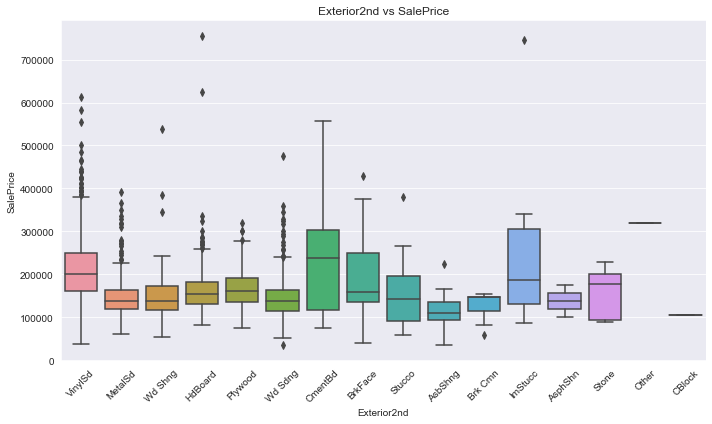

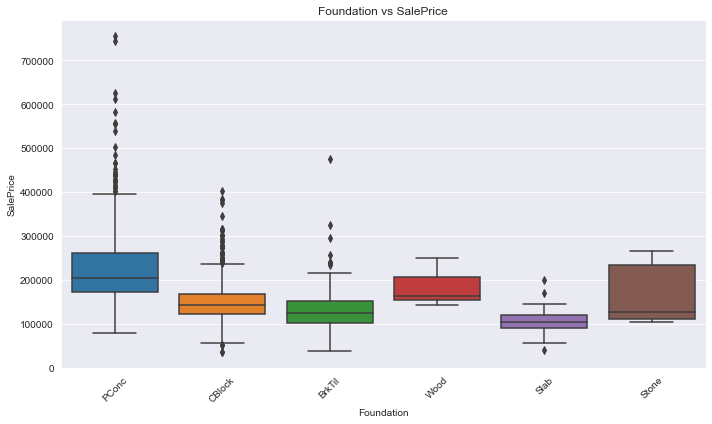

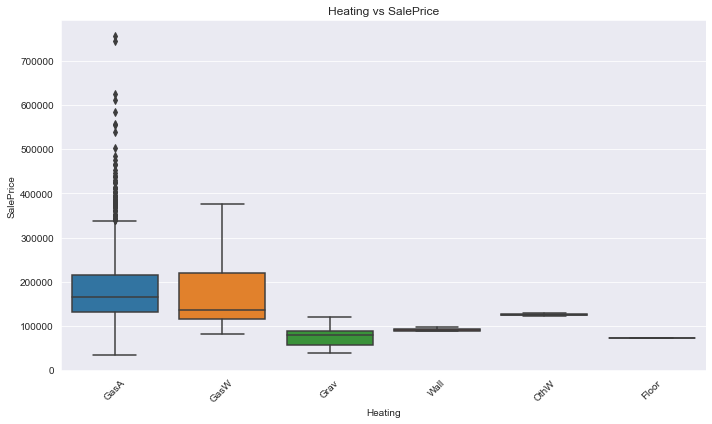

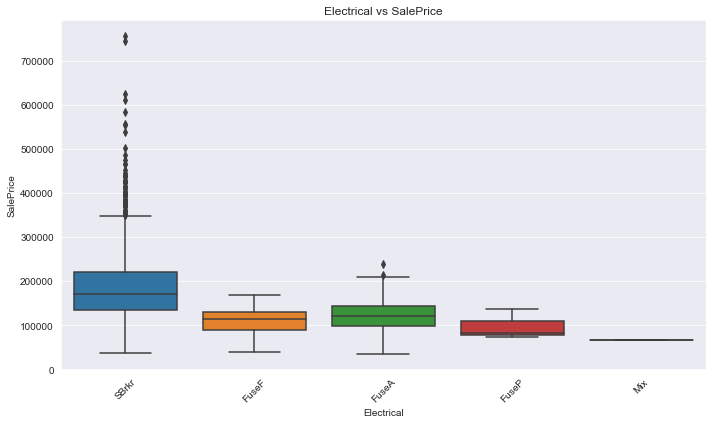

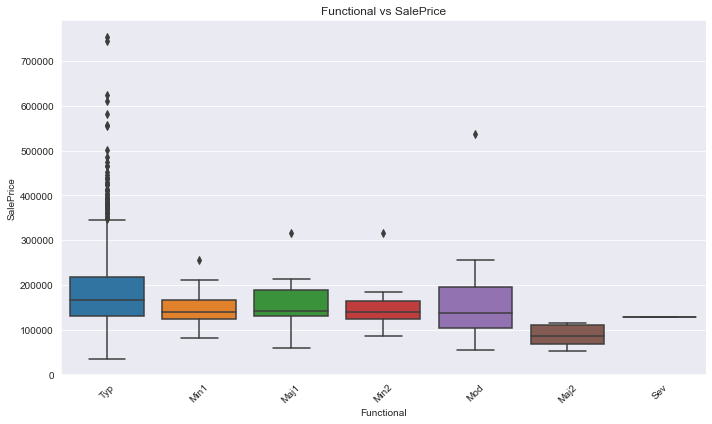

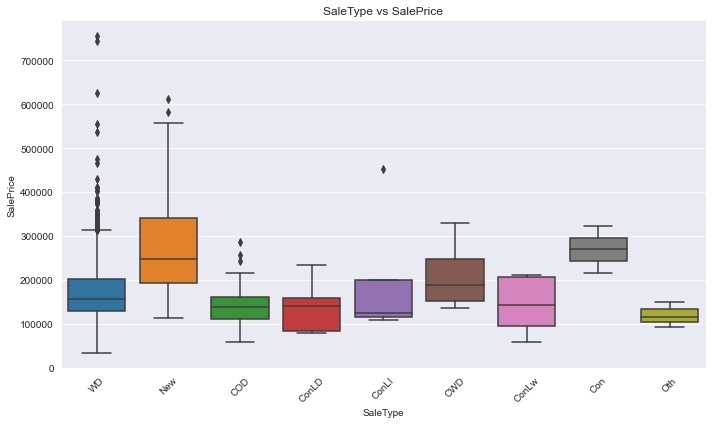

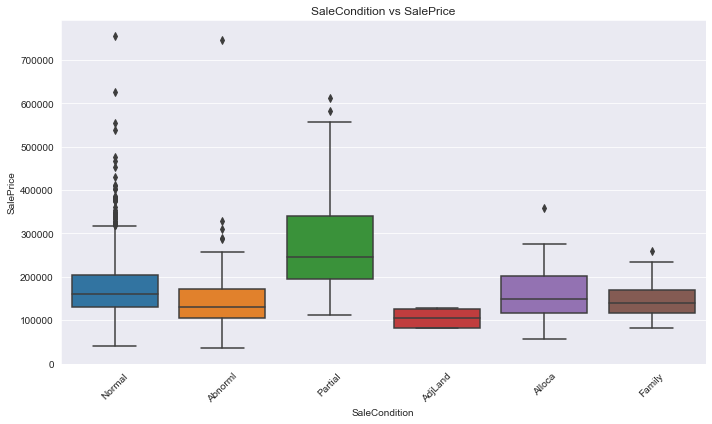

In [438]:

cnt=1
for i in l:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=i,y='SalePrice',data=df)
    plt.title(i+" vs SalePrice")
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()
    

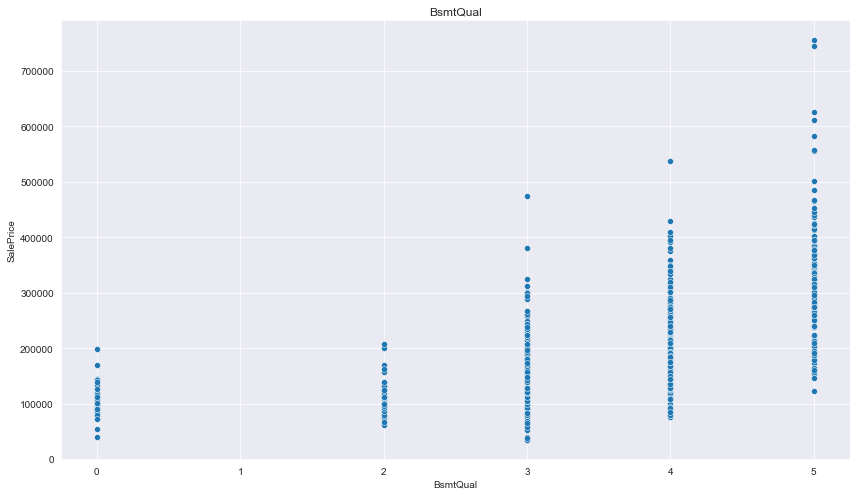

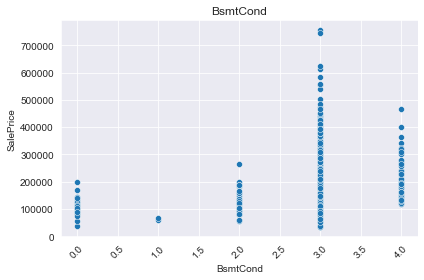

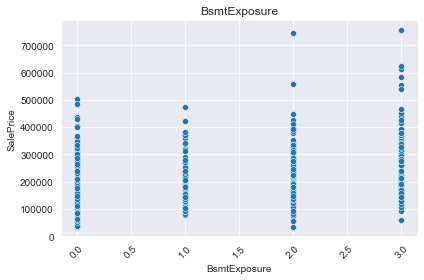

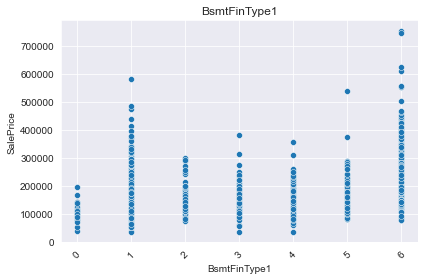

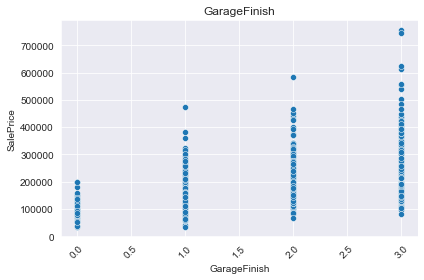

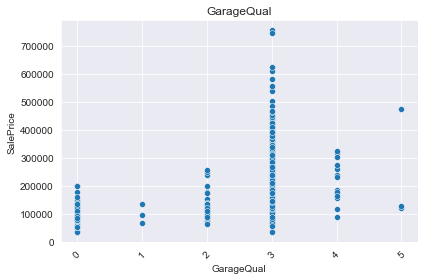

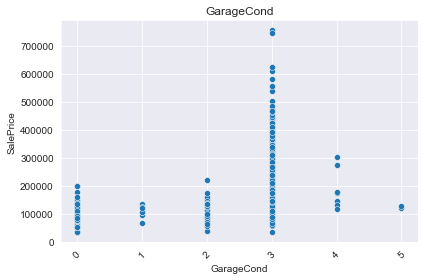

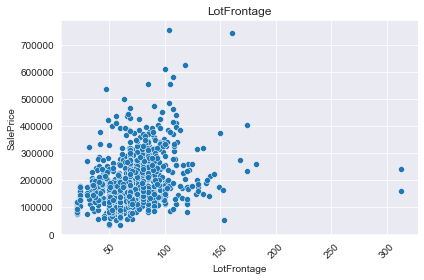

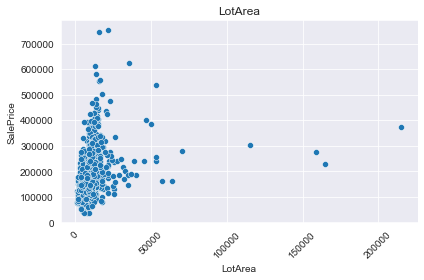

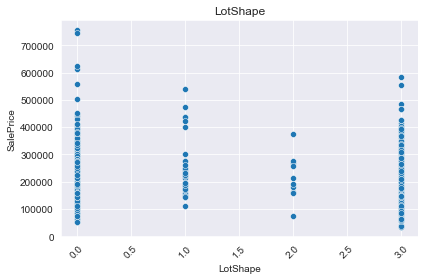

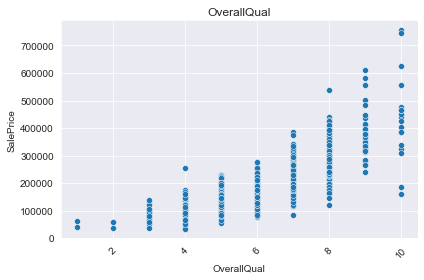

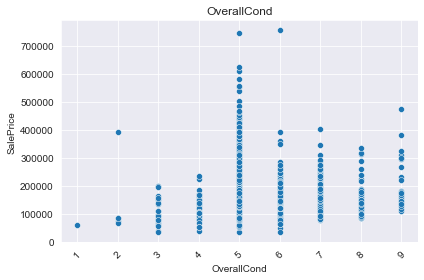

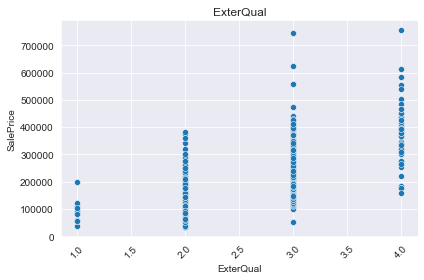

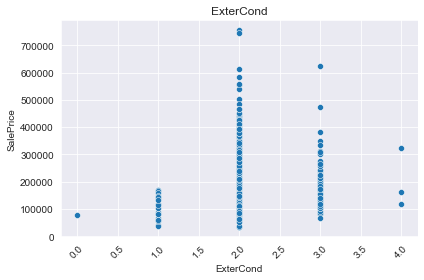

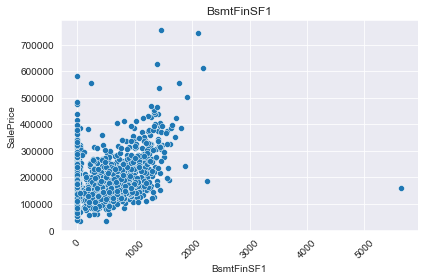

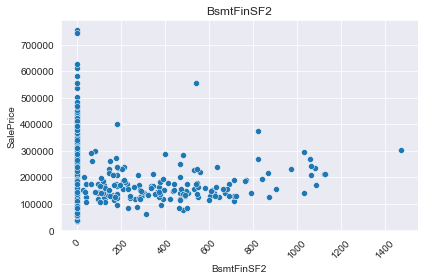

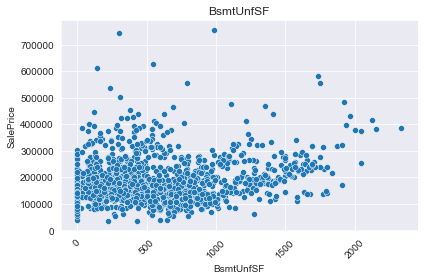

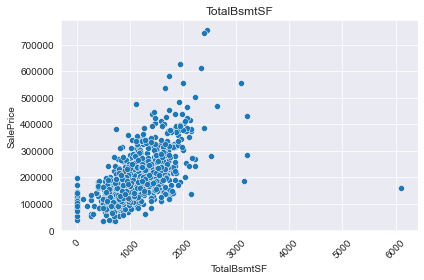

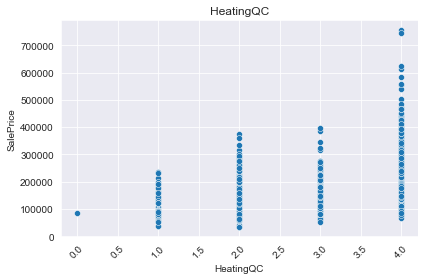

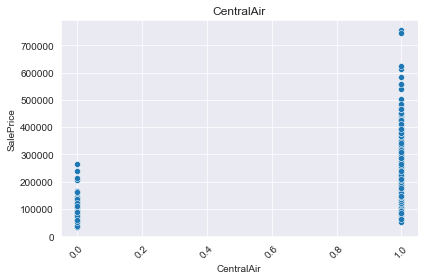

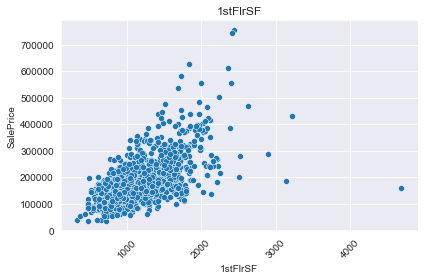

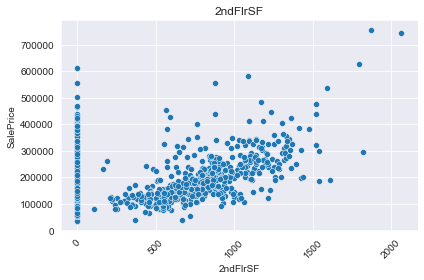

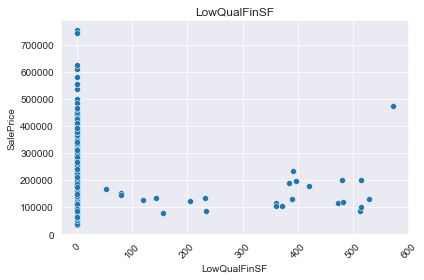

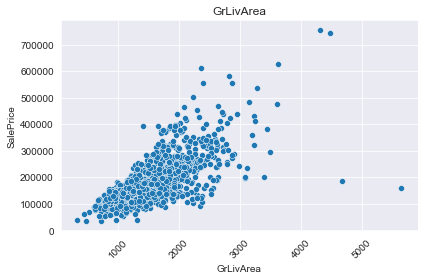

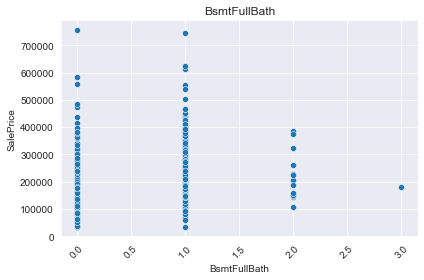

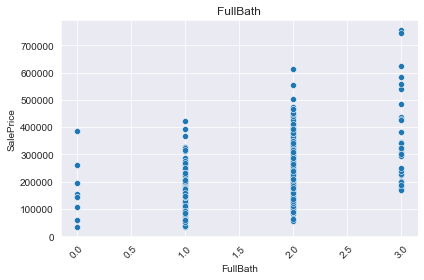

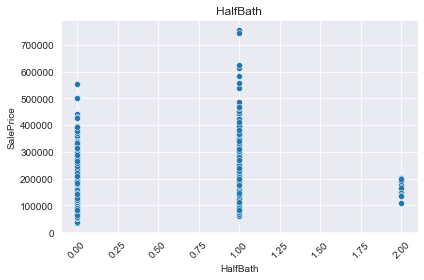

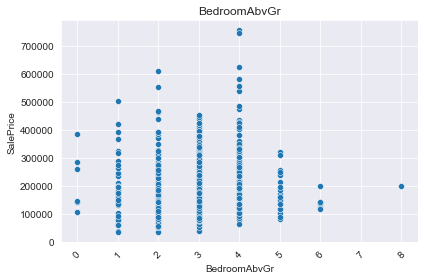

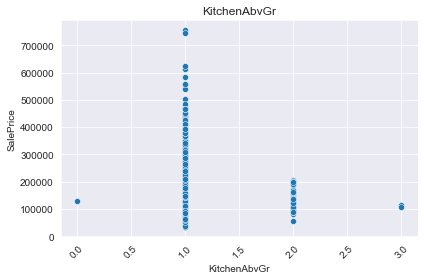

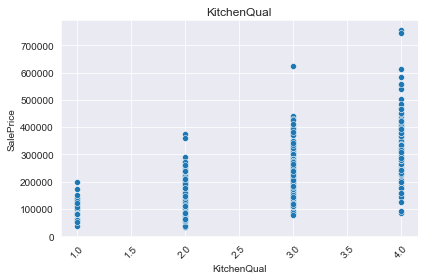

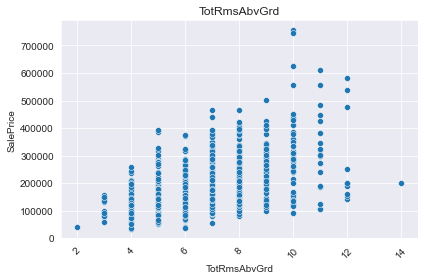

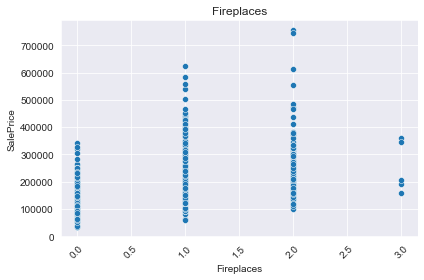

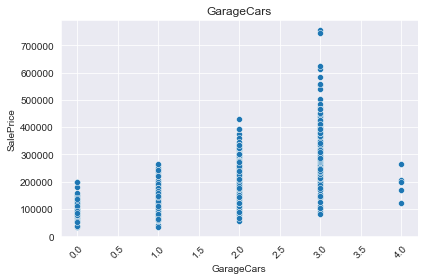

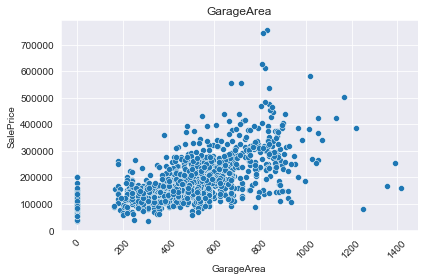

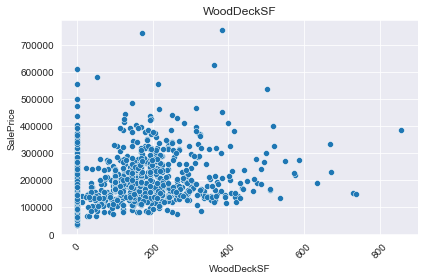

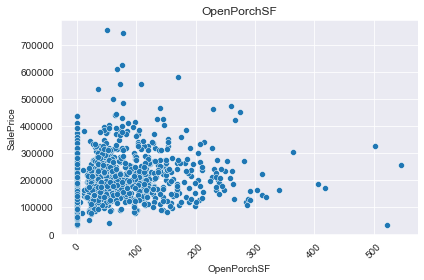

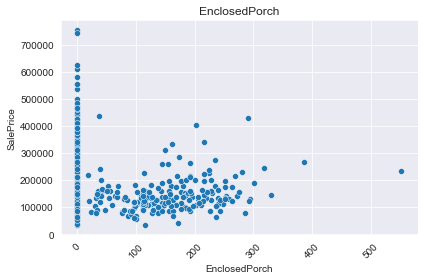

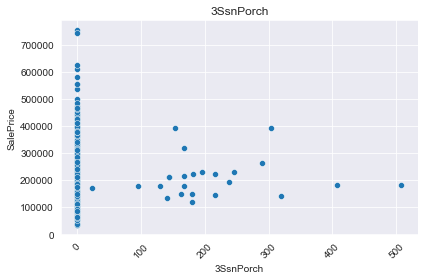

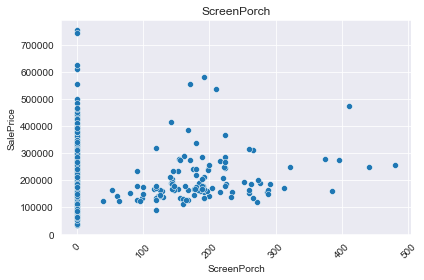

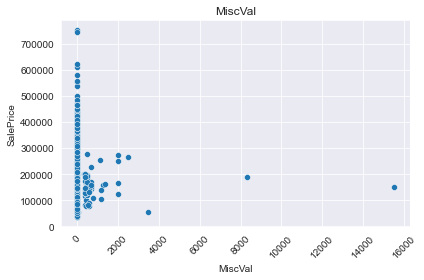

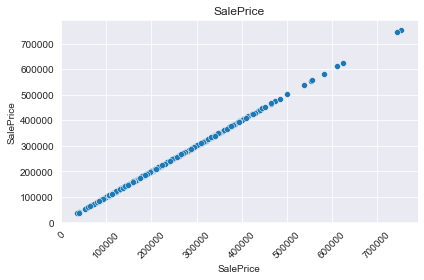

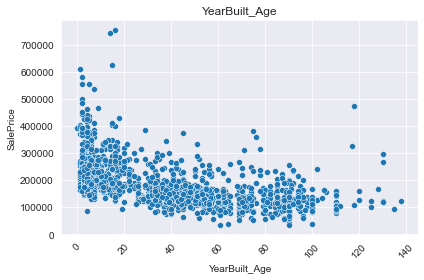

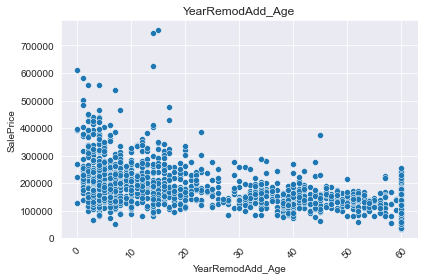

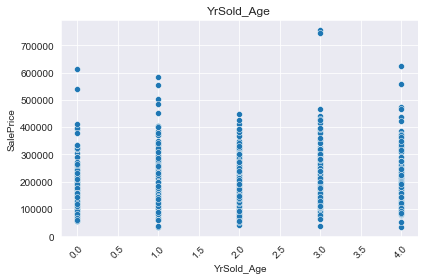

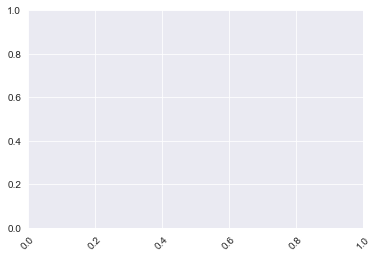

In [439]:
plt.figure(figsize=(12,7))
cnt=1
for i in l1:
    sns.set_style("darkgrid")
    sns.scatterplot(x=i, y='SalePrice',data=df)
    plt.title(i)
    plt.tight_layout()
    plt.show()
    plt.xticks(rotation = 45)
   



### Corelation between features

<AxesSubplot:>

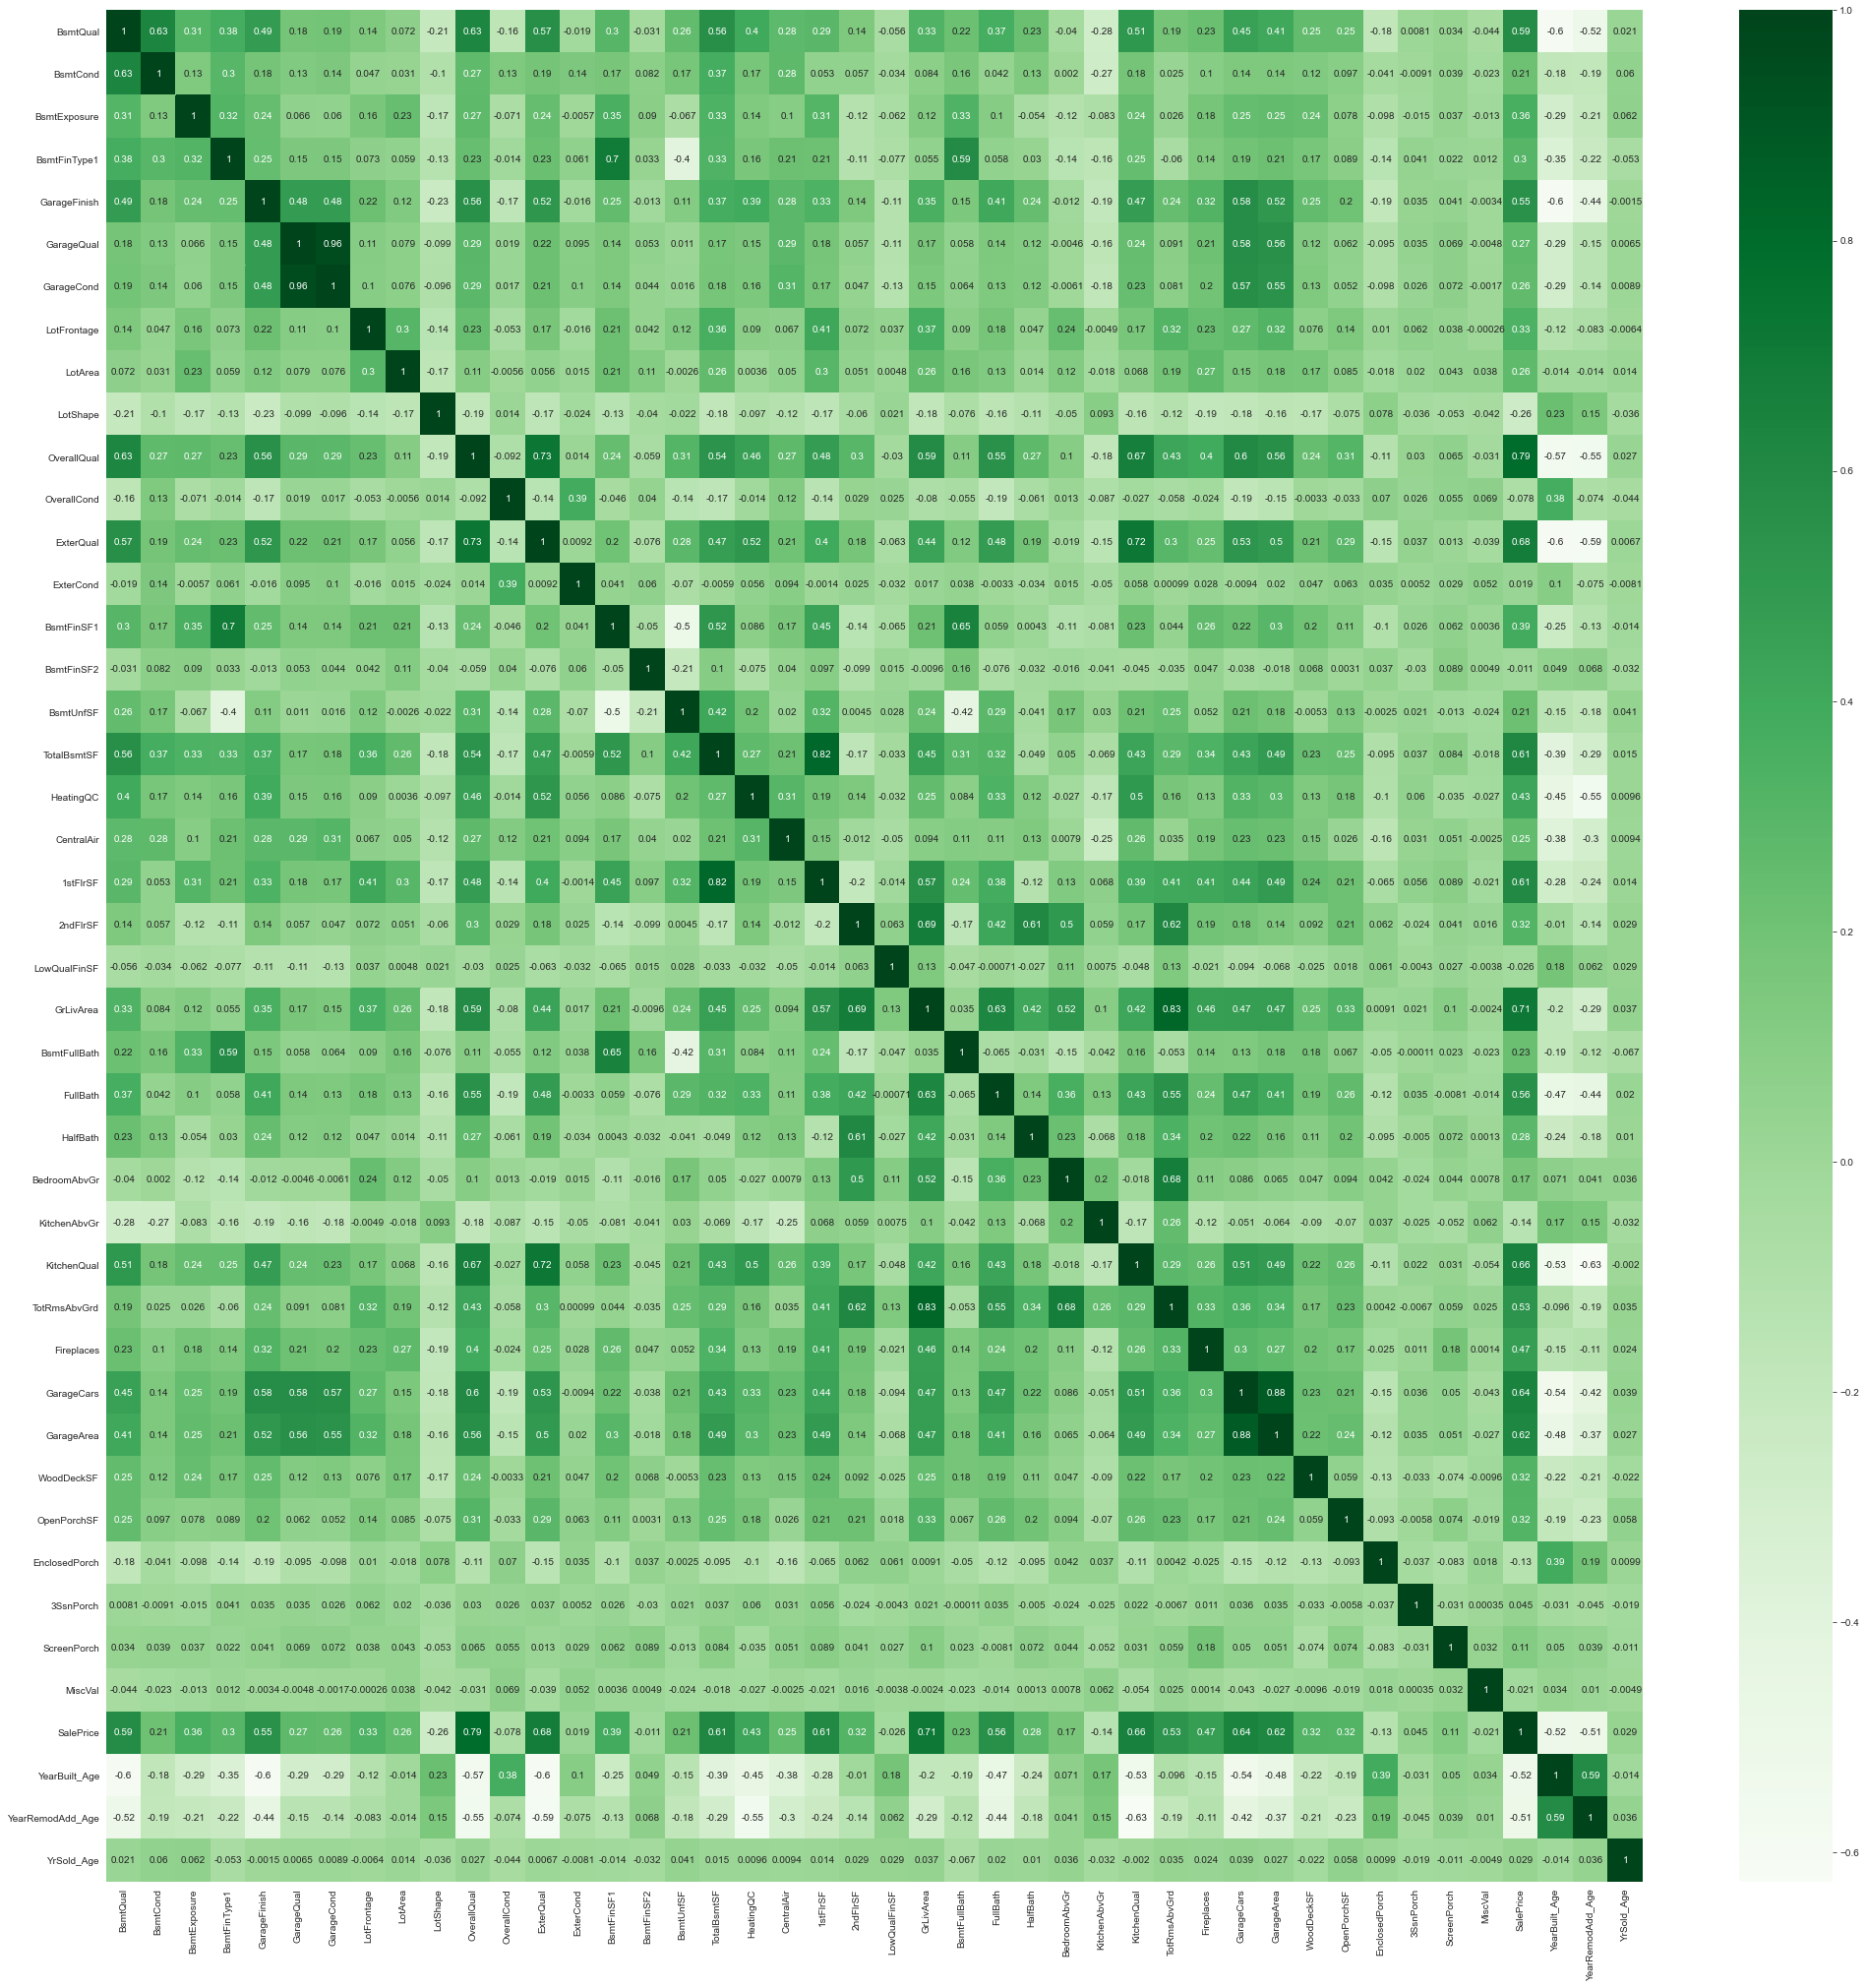

In [440]:
fig_dims = (35, 35)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(data=df.corr(),ax=ax,cmap='Greens',annot=True)

In [441]:
X = df.loc[:, df.columns != "SalePrice"]
y=df['SalePrice']

In [442]:
l_categorical.shape

(1460, 23)

In [443]:
#Creating dummy varibles for categorical variables
house_dummies = pd.get_dummies(l_categorical, drop_first=True)
house_dummies.head()

,Alley_No,Alley_Pave,MasVnrType_BrkFace,MasVnrType_No,MasVnrType_None,MasVnrType_Stone,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No,FireplaceQu_Po,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [444]:
X = X.drop(list(l_categorical.columns), axis=1)

In [445]:
X.shape

(1460, 43)

In [446]:
#Merging dummy varibles and continuous varibles
X = pd.concat([X, house_dummies], axis=1)

In [447]:
X.shape

(1460, 198)

In [448]:
X.head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,GarageFinish,GarageQual,GarageCond,LotFrontage,LotArea,LotShape,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4,3,0,6,2,3,3,65.0,8450,3,...,0,0,0,0,1,0,0,0,1,0
1,4,3,3,5,2,3,3,80.0,9600,3,...,0,0,0,0,1,0,0,0,1,0
2,4,3,1,6,2,3,3,68.0,11250,0,...,0,0,0,0,1,0,0,0,1,0
3,3,4,0,5,1,3,3,60.0,9550,0,...,0,0,0,0,1,0,0,0,0,0
4,4,3,2,6,2,3,3,84.0,14260,0,...,0,0,0,0,1,0,0,0,1,0


### Spliting the data into train and test 

In [449]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [450]:
l1.remove("SalePrice")

### Feature scaling

In [451]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[l1]=scaler.fit_transform(X_train[l1])
X_test[l1]=scaler.transform(X_test[l1])

### Ridge Regression

In [452]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.2s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [453]:
print(model_cv.best_params_)

{'alpha': 7.0}


In [454]:
alpha = 7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.59205635e+04 -1.12165080e+04  2.73481969e+04  1.33050609e+04
  1.14115489e+04  2.17155961e+03 -5.39851023e+03  1.82434472e+02
  1.59546738e+04 -9.08403951e+01  6.18467833e+04  1.92866102e+04
  2.24693041e+04 -1.12708517e+03  1.54105773e+04  2.73581932e+03
  5.73908836e+03  1.70894282e+04  4.12562891e+03  3.64782428e+03
  3.75069501e+04  5.16751826e+04 -2.03064933e+03  5.14399485e+04
  1.86603298e+04  2.86344742e+04  1.36036958e+04  9.11621823e+02
 -8.68274531e+03  2.67825045e+04  3.14777677e+04  2.21766754e+04
  2.96188865e+04  2.21014035e+04  1.41510434e+04  2.93450616e+03
  7.36532035e+02  1.00494310e+04  6.58673336e+03 -1.39032313e+03
 -2.09960302e+03 -6.72338975e+03  2.83229142e+03 -2.10343553e+02
  1.77191954e+03  2.62562857e+03  3.55569764e+03  1.65269420e+03
  3.52072723e+02 -1.42141112e+04 -1.24418012e+04 -1.39375763e+04
 -1.60869747e+04 -1.42509073e+04  2.13178509e+03 -3.63952851e+02
 -1.48806397e+03 -5.04490884e+03  5.38876279e+01  1.33030353e+04
  1.55172578e+03  5.80076

In [455]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(round(r2_train_lr,3))
metric2.append(round(r2_train_lr,3))

r2_test_lr = r2_score(y_test, y_pred_test)
print(round(r2_test_lr,3))
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(round(rss1_lr,3))

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.866
0.853
857097831310.487
415523929417.6085
839468982.6743262
948684770.3598368


### Lasso Regression

In [456]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100,120, 500, 1000 ]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:   12.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 120, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [457]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 120}


In [458]:
#Fitting Ridge model f1or alpha = 100 and printing coefficients which have been penalised

alpha =120

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=120)

In [459]:
lasso.coef_

array([ 1.98055077e+04, -6.35584201e+03,  2.68988789e+04,  1.27491578e+04,
        1.09438269e+04, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        3.16696231e+03,  0.00000000e+00,  1.01457400e+05,  2.20878864e+04,
        1.63505932e+04, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  1.18193885e+03,  5.26628622e+02,
        0.00000000e+00,  3.54654492e+04, -0.00000000e+00,  2.11004605e+05,
        1.91708638e+04,  1.21185140e+04,  6.92491922e+03, -0.00000000e+00,
       -8.96601964e+03,  2.66342415e+04,  2.38500040e+03,  2.01900782e+04,
        4.17472990e+04,  0.00000000e+00,  1.05383582e+04, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  2.84179597e+03, -0.00000000e+00,
       -0.00000000e+00, -2.00304957e+03,  1.36432080e+03,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.52565259e+02,
       -1.55840412e+03, -0.00000000e+00, -1.47481604e+03, -0.00000000e+00,
       -2.46336922e+03, -

In [460]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(round(r2_train_lr,3))
metric3.append(round(r2_train_lr,3))

r2_test_lr = r2_score(y_test, y_pred_test)
print(round(r2_test_lr,3))
metric3.append(round(r2_test_lr,3))

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(round(rss1_lr,3))

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.865
0.855
861825998683.4248
409764832289.4378
844099900.7673112
935536146.7795384


In [461]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': metric2
        }

rg_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression'] )

ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([ rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.660000e-01,8.650000e-01
1,R2 Score (Test),8.525838e-01,8.550000e-01
2,RSS (Train),8.570978e+11,8.618260e+11
3,RSS (Test),4.155239e+11,4.097648e+11
4,MSE (Train),2.897359e+04,2.905340e+04
5,MSE (Test),3.080073e+04,3.058654e+04


In [462]:
betas = pd.DataFrame(index=X.columns)

In [463]:
betas.rows = X.columns

In [464]:

betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [465]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge,Lasso
BsmtQual,25920.563548,19805.507670
BsmtCond,-11216.508026,-6355.842006
BsmtExposure,27348.196885,26898.878891
BsmtFinType1,13305.060948,12749.157759
GarageFinish,11411.548939,10943.826920
GarageQual,2171.559610,-0.000000
GarageCond,-5398.510232,-0.000000
LotFrontage,182.434472,-0.000000
LotArea,15954.673782,3166.962312
LotShape,-90.840395,0.000000


In [466]:
#top 10 features from Lasso 
betas['Lasso'].abs().sort_values(ascending=False).head(10)

GrLivArea               211004.605253
OverallQual             101457.400297
Neighborhood_NoRidge     53147.531657
Neighborhood_NridgHt     45511.270469
GarageCars               41747.299045
2ndFlrSF                 35465.449231
BsmtExposure             26898.878891
KitchenQual              26634.241538
Neighborhood_StoneBr     22418.586420
OverallCond              22087.886364
Name: Lasso, dtype: float64

In [467]:
#top 10 features from Ridge
betas['Ridge'].abs().sort_values(ascending=False).head(10)

OverallQual             61846.783285
2ndFlrSF                51675.182576
GrLivArea               51439.948516
Neighborhood_NoRidge    44834.390104
1stFlrSF                37506.950107
Neighborhood_NridgHt    34512.672376
TotRmsAbvGrd            31477.767681
GarageCars              29618.886471
FullBath                28634.474202
BsmtExposure            27348.196885
Name: Ridge, dtype: float64

### Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


The optimum value of alpha
Ridge regression = 7
Lasso regression =120


#### Building the model after doubling the optimal lambda for ridge regression

In [468]:
alpha = 14
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)


Ridge(alpha=14)

In [469]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(round(r2_train_lr,3))
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(round(r2_test_lr,3))
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.853
0.844
940194758952.5646
439390060586.86414
920856766.848741
1003173654.307909


#### Accuracy before changing lambda for ridge

R_2score=0.8656733598864232 #traindata

R_2score=0.8525837860571168 #test data

#### Accuracy after changing the lambda for ridge  

R_2score = 0.8526501895012473 #traindata

R_2score = 0.8441167533560952 #testdata 

#### Building the model after doubling the optimal lambda for lasso regression

In [470]:
#Fitting Ridge model f1or alpha = 100 and printing coefficients which have been penalised

alpha =240

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=240)

In [471]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8533769471740524
0.8435083746417129
935557537142.1863
441104905292.2917
916314923.7435713
1007088824.8682458


#### Accuracy before the changing the lambda

R_2score = 0.8649323489844003 #traindata

R_2score = 0.8546269518876723 #testdata

#### Accuracy after chaning the lambda

R_2score = 0.8533769471740524 #traindata

R_2score = 0.8435083746417129 #testdata 

Q)After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

Five important predictor varibales of lasso before dropping first five are

GrLivArea               
OverallQual             
Neighborhood_NoRidge     
Neighborhood_NridgHt     
GarageCars

In [472]:
# dropping these five predictors
X_train.drop(['GrLivArea','OverallQual','Neighborhood_NoRidge','Neighborhood_NridgHt','GarageCars'],inplace=True,axis=1)

In [473]:
# dropping these five predictors
X_test.drop(['GrLivArea','OverallQual','Neighborhood_NoRidge','Neighborhood_NridgHt','GarageCars'],inplace=True,axis=1)

In [474]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100,120, 500, 1000 ]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:   12.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 120, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [475]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [476]:

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [477]:
betas = pd.DataFrame(index=X_train.columns)

In [478]:
betas['Lasso'] = lasso.coef_

In [479]:
betas['Lasso'].abs().sort_values(ascending=False).head(10)

1stFlrSF                209693.313906
2ndFlrSF                142189.760522
GarageArea               52939.714811
BsmtQual                 46558.500812
ExterQual                42949.777649
Neighborhood_Edwards     33775.841036
Neighborhood_CollgCr     31497.495765
KitchenQual              31417.122048
Neighborhood_Gilbert     27352.359462
Neighborhood_Mitchel     27302.689590
Name: Lasso, dtype: float64

Next five important predictors after removing the top five

1stFlrSF                
2ndFlrSF                
GarageArea              
BsmtQual                 
ExterQual